In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

## # Logistic Regression from Scratch

In [21]:

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

In [22]:
data = pd.read_csv('Data-Melbourne_F_fixed.csv')

In [23]:
data

,Serial No.,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


In [24]:
# Drop the first column by its index
data = data.drop(data.columns[0], axis=1)

In [25]:
data.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7


## Feature Engineering: Create a new target variable 'Operational_Status' 

In [26]:

def create_operational_status(data):
    optimal_conditions = (
        (data['Ammonia'] < 30) & 
        (data['Biological Oxygen Demand'] < 400) & 
        (data['Chemical Oxygen Demand'] < 800) & 
        (data['Total Nitrogen'] < 70)
    )
    data['Operational_Status'] = np.where(optimal_conditions, 1, 0)

create_operational_status(data)

## EDA

In [27]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
Operational_Status          0
dtype: int64


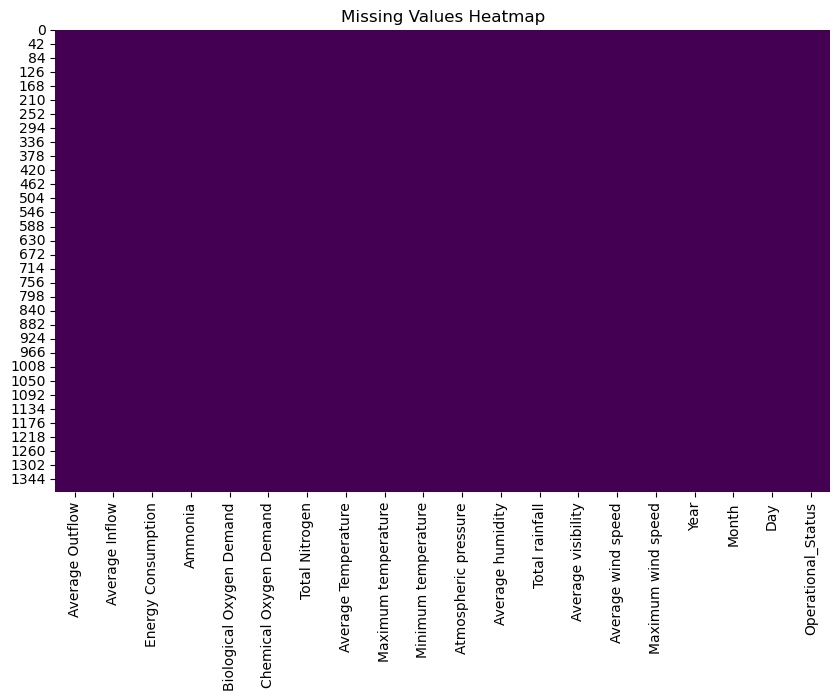

In [28]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [29]:
# Descriptive statistics
data.describe()


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660,0.065847
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422,0.248104
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000,0.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000,0.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000,0.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000,1.000000


In [30]:
# Check for skewness in numerical features
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness:.2f}")

Skewness of Average Outflow: 0.38
Skewness of Average Inflow: 3.75
Skewness of Energy Consumption: -0.15
Skewness of Ammonia: 0.31
Skewness of Biological Oxygen Demand: 1.23
Skewness of Chemical Oxygen Demand: 0.74
Skewness of Total Nitrogen: -0.26
Skewness of Average Temperature: 0.55
Skewness of Maximum temperature: 0.49
Skewness of Minimum temperature: 0.50
Skewness of Atmospheric pressure: 16.55
Skewness of Average humidity: -0.81
Skewness of Total rainfall: 8.76
Skewness of Average visibility: 22.20
Skewness of Average wind speed: 0.83
Skewness of Maximum wind speed: 0.55
Skewness of Year: 0.10
Skewness of Month: 0.13
Skewness of Day: 0.04


In [31]:
from scipy import stats
# Function to apply transformations based on skewness
def correct_skewness(df):
    for column in df.columns:
        skewness = df[column].skew()
        if skewness > 1:  # Highly right-skewed
            df[column] = np.log1p(df[column])  # Log transformation
        elif skewness < -1:  # Highly left-skewed
            df[column] = np.expm1(df[column])  # Exponential transformation
        elif skewness > 0:  # Moderately right-skewed
            df[column] = np.sqrt(df[column])  # Square root transformation
        elif skewness < 0:  # Moderately left-skewed
            df[column] = np.cbrt(df[column])  # Cube root transformation

# Apply skewness correction to the existing DataFrame 'data'
correct_skewness(data)

# Display corrected data and their new skewness values
print("Corrected Data:")
data

Corrected Data:


C:\Users\Sagar\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Operational_Status
0,1.714934,1.277874,56.025499,5.196152,5.902633,27.018512,3.923072,4.393177,5.009990,3.549648,0.0,3.825862,0.924259,2.397895,5.186521,7.314369,44.877611,1.00000,1.000000,0.693147
1,1.713476,1.376497,56.631458,5.000000,5.916202,27.202941,3.915433,4.135215,4.857983,3.507136,0.0,3.979057,0.000000,2.397895,3.794733,5.272571,44.877611,1.00000,1.414214,0.693147
2,1.711140,1.441019,58.676192,6.480741,6.037871,28.913665,4.010846,4.098780,5.215362,2.966479,0.0,3.608826,0.223144,2.397895,5.648008,7.816649,44.877611,1.00000,2.236068,0.000000
3,1.711140,1.471095,59.206877,6.000000,6.066108,29.154759,3.979057,3.820995,4.460942,3.331666,0.0,3.659306,0.000000,2.397895,5.196152,6.236986,44.877611,1.00000,2.449490,0.000000
4,1.707923,1.567365,58.754317,6.782330,6.232448,31.874755,4.032854,3.660601,4.370355,2.828427,0.0,4.020726,0.000000,2.397895,4.538722,5.932959,44.877611,1.00000,2.645751,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2.251222,1.743269,67.382090,5.291503,5.739793,25.690465,3.888747,2.607681,3.162278,2.000000,0.0,3.825862,0.000000,2.397895,3.794733,4.711688,44.933284,2.44949,4.472136,0.693147
1378,2.425283,1.873339,66.452205,6.324555,5.525453,26.457513,3.929407,2.756810,4.000000,1.732051,0.0,4.140818,0.000000,0.000000,3.674235,5.089204,44.933284,2.44949,4.898979,0.000000
1379,2.153602,1.759753,67.530795,6.855655,5.564520,29.325757,4.000000,3.114482,4.000000,1.732051,0.0,4.020726,0.000000,2.397895,4.254409,5.089204,44.933284,2.44949,5.000000,0.000000
1380,2.317973,1.779856,68.161310,6.782330,5.707110,30.000000,3.968058,3.301515,4.123106,2.236068,0.0,4.020726,0.000000,2.397895,4.679744,5.932959,44.933284,2.44949,5.099020,0.000000


In [32]:
print("\nNew Skewness Values:")
data.skew()


New Skewness Values:


Average Outflow             -2.112045
Average Inflow               1.870822
Energy Consumption          -0.481928
Ammonia                     -0.196382
Biological Oxygen Demand     0.244794
Chemical Oxygen Demand       0.238527
Total Nitrogen              -0.868719
Average Temperature         -0.280018
Maximum temperature         -0.760394
Minimum temperature         -0.345608
Atmospheric pressure        16.552901
Average humidity            -4.044794
Total rainfall               5.438966
Average visibility          -1.023746
Average wind speed          -0.135672
Maximum wind speed          -0.428100
Year                         0.097328
Month                       -0.308001
Day                         -0.456557
Operational_Status           3.504848
dtype: float64

In [33]:
# Function to plot histograms before and after transformation
def plot_distributions(original_df, transformed_df):
    num_columns = original_df.shape[1]
    fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(12, 4 * num_columns))

    for i, column in enumerate(original_df.columns):
        # Plot original data
        axes[i, 0].hist(original_df[column], bins=30, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Original Distribution of {column}')
        axes[i, 0].set_xlabel('Value')
        axes[i, 0].set_ylabel('Frequency')

        # Plot transformed data
        axes[i, 1].hist(transformed_df[column], bins=30, color='green', alpha=0.7)
        axes[i, 1].set_title(f'Transformed Distribution of {column}')
        axes[i, 1].set_xlabel('Value')
        axes[i, 1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

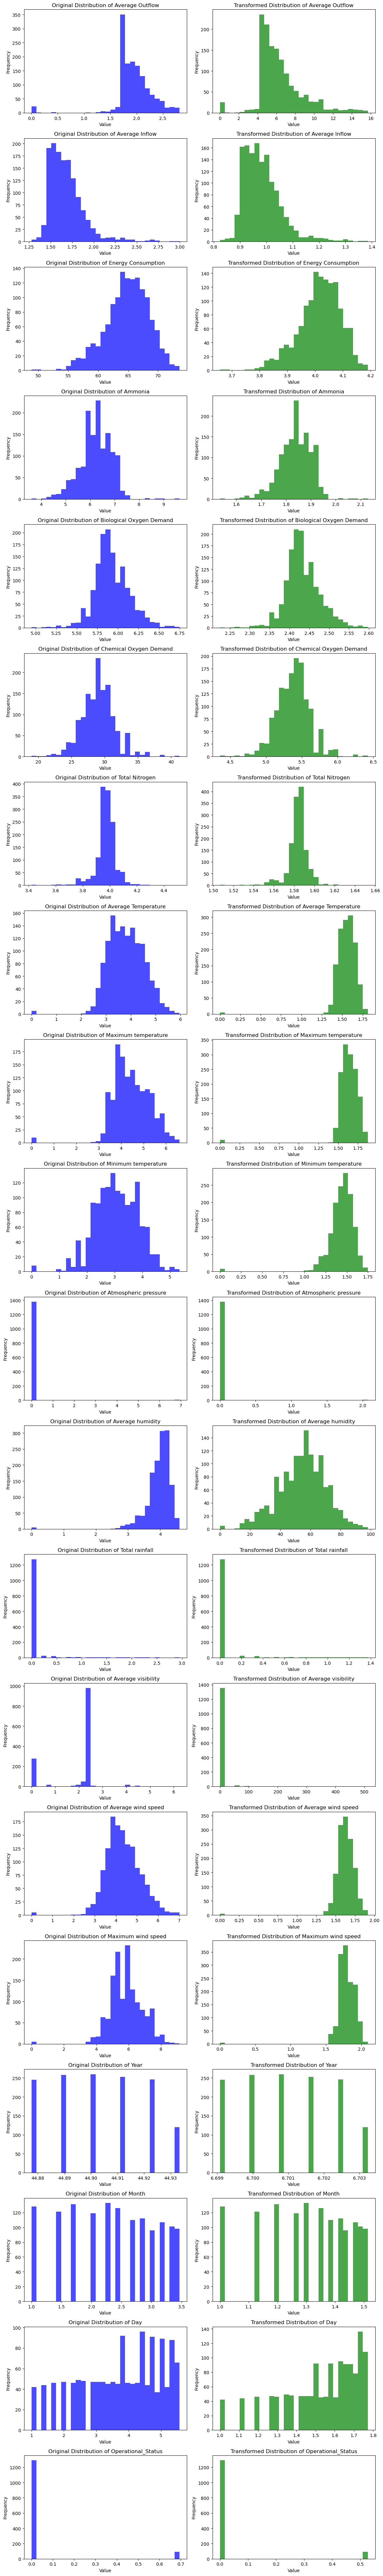

In [34]:
 # Store original data for comparison
original_data = data.copy()

# Apply skewness correction to the existing DataFrame 'data'
correct_skewness(data)

# Call the function to plot distributions
plot_distributions(original_data, data)  # Pass original data and transformed data

## Feature Engineering: Create derived features

In [35]:
#  Inflow/Outflow Ratio
if 'Average Inflow' in data.columns and 'Average Outflow' in data.columns:
    data['Inflow_Outflow_Ratio'] = data['Average Inflow'] / (data['Average Outflow'] + 1e-5)

#  Temperature Range
if 'Maximum temperature' in data.columns and 'Minimum temperature' in data.columns:
    data['Temperature Range'] = data['Maximum temperature'] - data['Minimum temperature']

#  Humidity/Temperature Interaction
if 'Average humidity' in data.columns and 'Average Temperature' in data.columns:
    data['Humidity_Temperature_Interaction'] = data['Average humidity'] * data['Average Temperature']

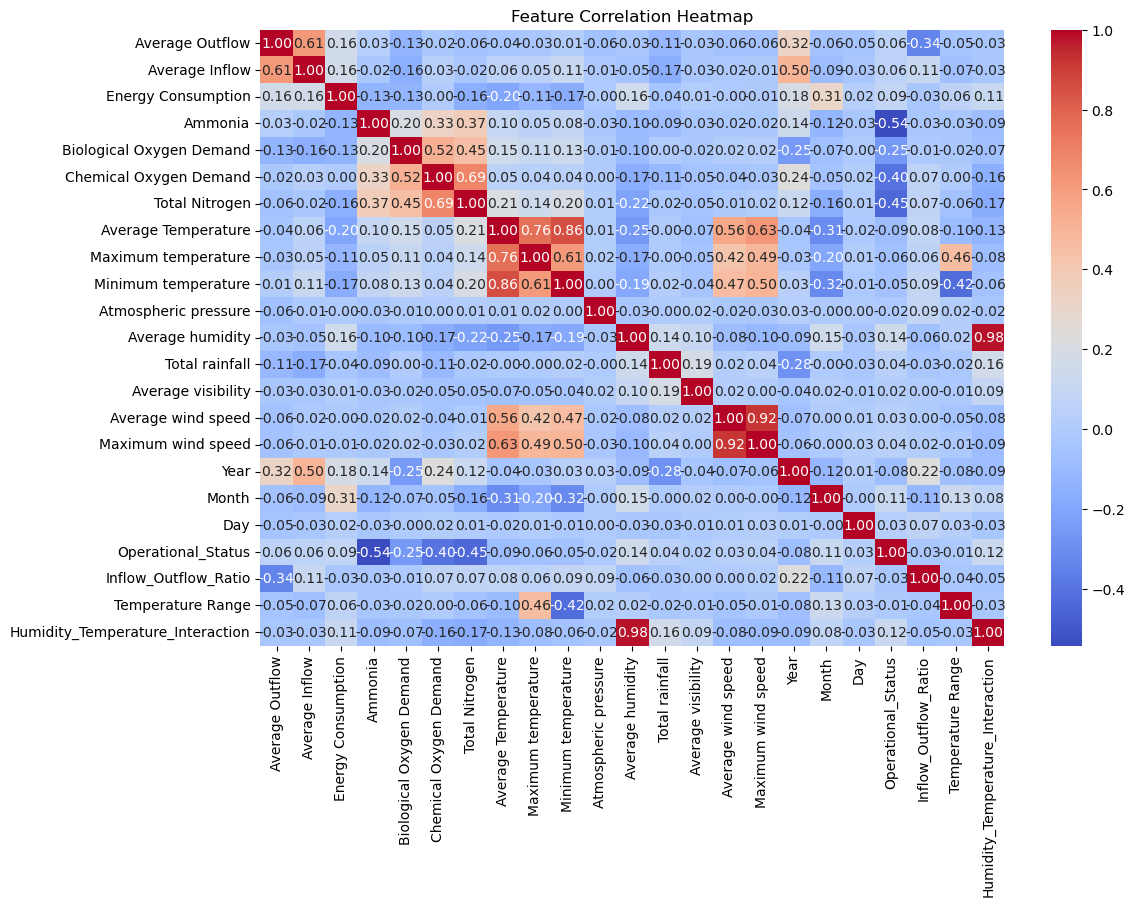

In [36]:
# Check correlations after creating new features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [37]:
# Define features and target
X = data.drop(columns=['Operational_Status'])  # Drop target column
y = data['Operational_Status']

In [38]:
y.unique()

array([0.52658903, 0.        ])

In [39]:
# Example: Convert continuous values into binary classes
y = np.where(y > 0.5, 1, 0)  # Replace 'threshold' with your desired cutoff


In [40]:
# Example: Define bins for multiclass classification
bins = [0, 10, 20, 30]  # Define the range for each bin
labels = [0, 1, 2]      # Define class labels
y = pd.cut(y, bins=bins, labels=labels)


In [41]:
# Handle NaN values in the target variable
y = y.fillna(0)  # Replace NaN with a default value (e.g., 0)

# Convert to integer
y = y.astype(int)


## SMOTE 

In [42]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Assuming 'data' is your DataFrame with potential NaN values

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # Choose appropriate strategy
data_imputed = imputer.fit_transform(data)

# Convert the imputed data back to DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

# Step 2: Convert continuous target variable to categorical
# Assuming the last column is the target variable
threshold = data_imputed.iloc[:, -1].median()  # You can choose a different threshold
data_imputed.iloc[:, -1] = (data_imputed.iloc[:, -1] > threshold).astype(int)  # Binary classification

# Step 3: Apply SMOTE
X = data_imputed.iloc[:, :-1]  # All columns except the last one as features
y = data_imputed.iloc[:, -1]    # Last column as target variable

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now X_resampled and y_resampled can be used for training your model


C:\Users\Sagar\AppData\Local\Temp\ipykernel_14656\1844397068.py:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_imputed.iloc[:, -1] = (data_imputed.iloc[:, -1] > threshold).astype(int)  # Binary classification


In [43]:
from collections import Counter
# Verify new class distribution
print("Class Distribution After SMOTE:", Counter(y_resampled))

Class Distribution After SMOTE: Counter({0: 692, 1: 692})


## Split the data into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


## Hyper parameter tuning

In [52]:
# Hyperparameter tuning for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), logreg_param_grid, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_
print("Best Parameters for Logistic Regression:", logreg_grid.best_params_)


C:\Users\Sagar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sagar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [53]:
# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("Best Parameters for KNN:", knn_grid.best_params_)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [54]:
# Hyperparameter tuning for Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='f1')
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Parameters for Decision Tree:", dt_grid.best_params_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}


In [55]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Parameters for Random Forest:", rf_grid.best_params_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_param_grid, cv=5, scoring='f1')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
print("Best Parameters for SVM:", svm_grid.best_params_)

Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


## Models with optimized hyperparameters

In [57]:
models = {
    "Logistic Regression (From Scratch)": LogisticRegressionFromScratch(learning_rate=0.01, iterations=1000),
    "Logistic Regression (Sklearn)": best_logreg,
    "KNN": best_knn,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "SVM": best_svm
}


##  Train and evaluate multiple models

In [58]:
for model_name, model in models.items():
    if model_name == "Logistic Regression (From Scratch)":
        model.fit(X_train.values, y_train.values)
        preds = model.predict(X_test.values)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"F1 Score: {f1_score(y_test, preds, average='binary'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n{classification_report(y_test, preds)}")


Model: Logistic Regression (From Scratch)
Accuracy: 0.92
F1 Score: 0.92
Confusion Matrix:
[[115  23]
 [  0 139]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       138
           1       0.86      1.00      0.92       139

    accuracy                           0.92       277
   macro avg       0.93      0.92      0.92       277
weighted avg       0.93      0.92      0.92       277


Model: Logistic Regression (Sklearn)
Accuracy: 0.99
F1 Score: 0.99
Confusion Matrix:
[[138   0]
 [  2 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.99      0.99       139

    accuracy                           0.99       277
   macro avg       0.99      0.99      0.99       277
weighted avg       0.99      0.99      0.99       277


Model: KNN
Accuracy: 0.96
F1 Score: 0.96
Confusion Matrix:
[[132   6]
 [  6 